# Setup

### Activate inline plotting

In [1]:
%pylab inline
import sys
sys.path.insert(0, '..')

Populating the interactive namespace from numpy and matplotlib


### Import Dataset(s)

In [2]:
from data import Dataset

In [3]:
signal = Dataset('../data/signal_TDR.root')

### Drawing Function(s)

In [4]:
def setup_plot_for_detector(size=(15, 15)):
    figsize(*size)
    axes(polar=True)
    # set appropriate
    ylim(0, 85)   

### Check that each cell has the right number of neighbours

In [5]:
from scipy.sparse import *
bad_neighs = np.zeros(signal.total_wires)
n_bad = 0

for wire in range(signal.total_wires):
    # Count the neighbours
    n_neigh = len(find(signal.wire_neighbours[wire,:])[1])
    if (wire < signal.first_wire[1]) or (wire >= signal.first_wire[-1]):
        if n_neigh != 5:
            bad_neighs[wire] = n_neigh
    else:
        if n_neigh !=8:
            bad_neighs[wire] = n_neigh

0


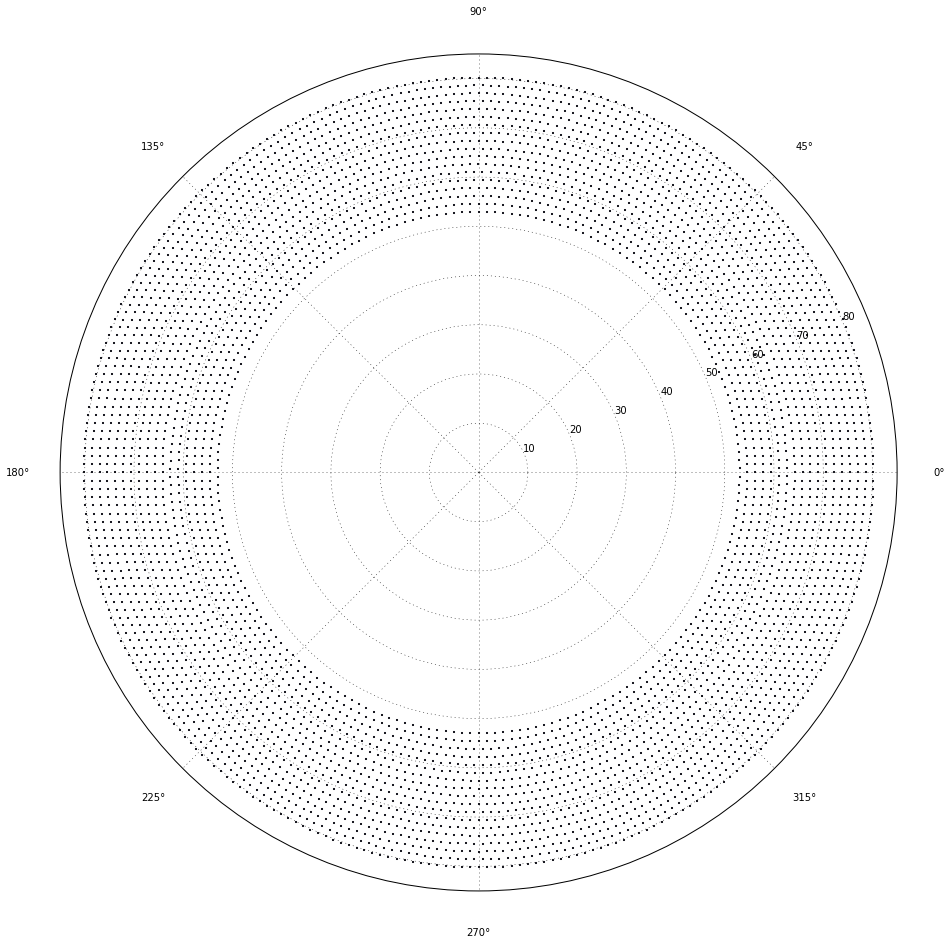

In [9]:
from scipy.sparse import *

setup_plot_for_detector()
rhos, phis = signal.get_wires_rhos_and_phis()
scatter(phis, rhos, marker='.', s=5)

bad_neigh_index = where( (bad_neighs!=0))
#few_neigh = where( ( (bad_neighs <= 5) & (bad_neighs!=0) ) | (bad_neighs == 7) )
#many_neigh = where( (bad_neighs == 6) | (bad_neighs >= 8)  ) 

print len(bad_neigh_index[0])
#print len(many_neigh[0]) + len(few_neigh[0])

scatter(phis[bad_neigh_index],rhos[bad_neigh_index], marker='o', s=50, c='b')
#scatter(phis[few_neigh],rhos[few_neigh], marker='o', s=50, c='b')
#scatter(phis[many_neigh],rhos[many_neigh], marker='o', s=50, c='r')

### Check that there are no cells closer then the current neighbours, keeping layer spacing in mind

In [93]:
from scipy.sparse import *
far_neighs = np.zeros(signal.total_wires)
furthest_n = np.zeros(signal.total_wires)
closest_nn = np.zeros(signal.total_wires)

for wire in range(signal.total_wires):
    # Get the neighbours
    neighs = find(signal.wire_neighbours[wire,:])[1]
    # Find the maximal distance
    max_n_dist = max(signal.wire_dists[wire,neighs])
    # Invert to find wire responsible
    far_n = where(signal.wire_dists[wire,neighs] == max_n_dist)
    far_n = neighs[far_n[0][0]]
    # Find the next to nearest neighbours
    n_neighs = find(signal.wire_neighbours[neighs,:])[1]
    n_neighs = set(n_neighs) - set(neighs) - set([wire])
    n_neighs = list(n_neighs)
    # Find the closest one, record which wire this was
    min_nn_dist = min(signal.wire_dists[wire,n_neighs])
    close_nn = where(signal.wire_dists[wire,n_neighs] == min_nn_dist)
    close_nn = n_neighs[close_nn[0][0]]
    # Check the distance
    dist = max_n_dist - min_nn_dist
    # If this distance is less than zero and these wires are on the same layer, we're in trouble
    if (max_n_dist - min_nn_dist > 0.000000001) and (signal.wire_rhos[far_n] == signal.wire_rhos[close_nn]) : 
        far_neighs[wire] = dist
        furthest_n[wire] = far_n
        closest_nn[wire] = close_nn
        
far_neigh_index = where( (far_neighs!=0))
print far_neigh_index

(array([], dtype=int64),)


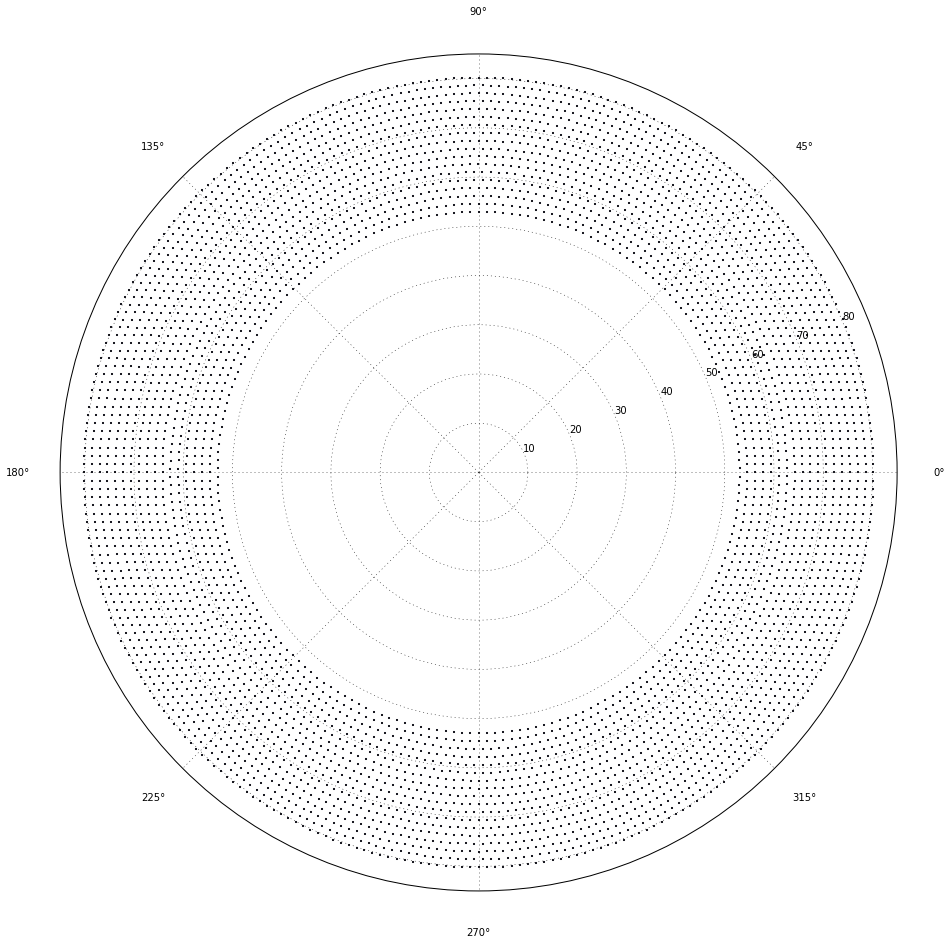

In [95]:
from scipy.sparse import *

setup_plot_for_detector()
rhos, phis = signal.get_wires_rhos_and_phis()
scatter(phis, rhos, marker='.', s=5)

scatter(phis[far_neigh_index],rhos[far_neigh_index], marker='o', s=50, c='b')
scatter(phis[far_neigh_index],rhos[far_neigh_index], marker='o', s=50, c='b')
scatter(phis[far_neigh_index],rhos[far_neigh_index], marker='o', s=50, c='b')

#scatter(phis[few_neigh],rhos[few_neigh], marker='o', s=50, c='b')
#scatter(phis[many_neigh],rhos[many_neigh], marker='o', s=50, c='r')

[  1.41421356   0.           1.41421356   2.82842712   4.24264069
   5.65685425   7.07106781   8.48528137   9.89949494  11.3137085 ]
